# Psychoinformatics - Week 15 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [8]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1 Basic Imaging Processing

### 1.1 Matplotlib vs. OpenCV

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


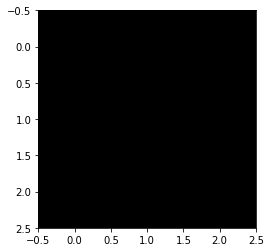

In [11]:
# Use Matplotlib to show an blank image:
img=np.zeros((3,3,3),dtype='uint8')
print(img)
plt.imshow(img);

In [10]:
# Manipulate the RGB values of a pixel:
img2=img.copy()
img2[0,0,0],img2[0,1,1],img2[0,2,2]=[255,255,255]
print(img2)
plt.imshow(img2);

NameError: name 'img' is not defined

In [9]:
# Try OpenCV:
#!pip install opencv-python
import cv2
cv2.startWindowThread()
cv2.imshow('Test',img2)
cv2.waitKey(0); cv2.destroyAllWindows()

NameError: name 'img2' is not defined

### 1.1 Images

#### 1.1.1 From files

In [17]:
# Download the girl!
import urllib.request
urllib.request.urlretrieve('http://www.gx8899.com/uploads/allimg/171025/3-1G025101H3-50.jpg','girl.jpg')

('girl.jpg', <http.client.HTTPMessage at 0x7fbb5008e2b0>)

In [6]:
# Show me the girl!
img3=cv2.imread('girl.jpg')
print(img3.shape)
cv2.imshow('Test',img3)
cv2.waitKey(0); cv2.destroyAllWindows()

(300, 300, 3)


In [7]:
# Show me the girl again with Matplotlib!
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3)
plt.subplot(1,2,2)
## Convert BGR (default in openCV) to RGB (default in matplotlib)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB));

NameError: name 'plt' is not defined

(300, 300)


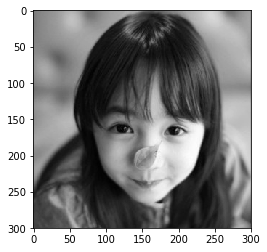

In [15]:
img3_gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
print(img3_gray.shape)
cv2.imwrite('girl_gray.jpg',img3_gray)
plt.imshow(img3_gray,cmap='gray');

#### 1.1.2 From real-time camera

In [12]:
import cv2
cap = cv2.VideoCapture(0) # 0=first camera

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) == ord('q'): # wait for 1ms
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### 1.2 2D Spatial Filtering/Convolution


In [13]:
kernel1=np.ones((10,10),np.float32)/100
print(kernel1)
img3_gray_smooth=cv2.filter2D(img3_gray,-1,kernel1)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray');
plt.subplot(1,2,2); plt.imshow(img3_gray_smooth,cmap='gray');

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


NameError: name 'img3_gray' is not defined

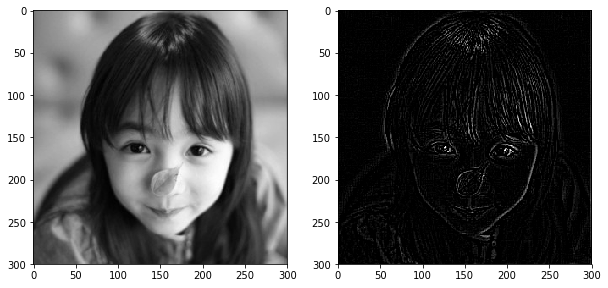

In [15]:
# LGN cells: on-center off-surround RF

# 8*(peripheral) + (center) = 0
# 8*(-1)         + (8)      = 0
kernel2=np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])
img3_gray_LGN=cv2.filter2D(img3_gray,-1,kernel2)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_LGN,cmap='gray');

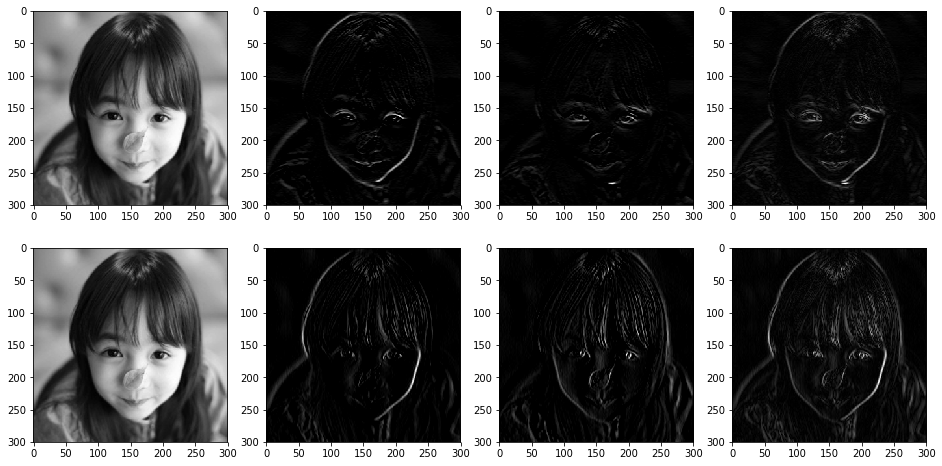

In [16]:
# V1 simple cells: horizontally enlongated on-off
kernel3=np.array([[1,1,1],
                  [-1,-1,-1]])
kernel4=np.array([[-1,-1,-1],
                  [1,1,1]])

kernel5=np.array([[1,-1],
                  [1,-1],
                  [1,-1]])

kernel6=np.array([[-1,1],
                  [-1,1],
                  [-1,1]])

img3_gray_V1Ha=cv2.filter2D(img3_gray,-1,kernel3)
img3_gray_V1Hb=cv2.filter2D(img3_gray,-1,kernel4)
img3_gray_V1Va=cv2.filter2D(img3_gray,-1,kernel5)
img3_gray_V1Vb=cv2.filter2D(img3_gray,-1,kernel6)

# V1 complex cells: no on-off polarity
img3_gray_V1Hc=img3_gray_V1Ha+img3_gray_V1Hb
img3_gray_V1Vc=img3_gray_V1Va+img3_gray_V1Vb

# Plot all neurons' responses:
plt.figure(figsize=(16, 8))
plt.subplot(2,4,1); plt.imshow(img3_gray,cmap='gray');
plt.subplot(2,4,2); plt.imshow(img3_gray_V1Ha,cmap='gray');
plt.subplot(2,4,3); plt.imshow(img3_gray_V1Hb,cmap='gray');
plt.subplot(2,4,4); plt.imshow(img3_gray_V1Hc,cmap='gray');
plt.subplot(2,4,5); plt.imshow(img3_gray,cmap='gray');
plt.subplot(2,4,6); plt.imshow(img3_gray_V1Va,cmap='gray');
plt.subplot(2,4,7); plt.imshow(img3_gray_V1Vb,cmap='gray');
plt.subplot(2,4,8); plt.imshow(img3_gray_V1Vc,cmap='gray');

### 1.3 Down-sampling

### 1.3.1 Image pyramid (w/ Gaussian smoothing)
<img src="https://www.pyimagesearch.com/wp-content/uploads/2015/03/pyramid_example.png">

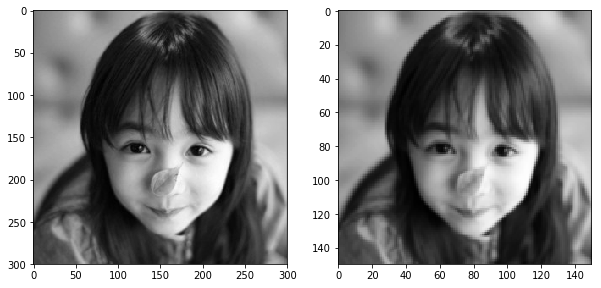

In [17]:
img3_gray_small=cv2.pyrDown(img3_gray)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_small,cmap='gray');

### 1.3.2 Max pooling
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width=50%>

In [18]:
import skimage.measure

a = np.array([
      [ 12,  20, 30,  0],
      [  8,  12,  2,  0],
      [ 34,  70, 37,  4],
      [112, 100, 25, 12]])

skimage.measure.block_reduce(a, (2,2), np.max)

array([[ 20,  30],
       [112,  37]])

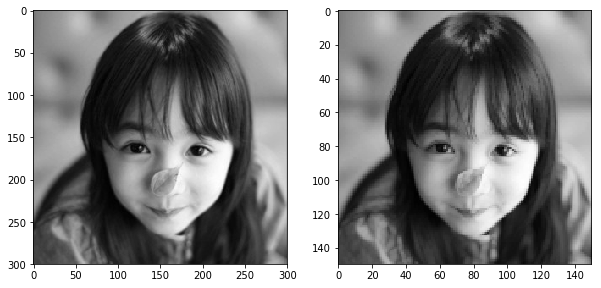

In [19]:
img3_gray_maxpooled=skimage.measure.block_reduce(img3_gray, (2,2), np.max)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(img3_gray,cmap='gray')
plt.subplot(1,2,2); plt.imshow(img3_gray_maxpooled,cmap='gray');

## 2 Basic Computer Vision

### 2.1 Face Detection

### 2.1.1 Basic detection using Haar Cascades

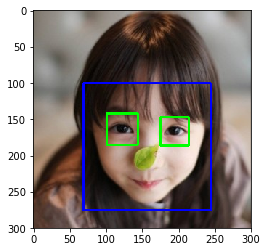

In [16]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml','haarcascade_frontalface_default.xml')
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml','haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(img3_gray)
for (x,y,w,h) in faces:
    cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img3_gray[y:y+h, x:x+w]
    roi_color = img3[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB));

### 2.1.2 Facial landmarks using Dlib

In [19]:
#! pip install dlib
import dlib
urllib.request.urlretrieve('https://github.com/AKSHAYUBHAT/TensorFace/blob/master/openface/models/dlib/shape_predictor_68_face_landmarks.dat?raw=true','shape_predictor_68_face_landmarks.dat')

img3=cv2.imread('girl.jpg')
model="shape_predictor_68_face_landmarks.dat"
detector=dlib.get_frontal_face_detector()
poses=dlib.shape_predictor(model)
win=dlib.image_window()
detected_faces=detector(img3)
print("Found {} faces in the image".format(len(detected_faces)))
win.set_image(img3)
for i, rect in enumerate(detected_faces):
    print("Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i,rect.left(),rect.top(),rect.right(),rect.bottom()))
    win.add_overlay(rect)
    landmarks=poses(img3,rect)
    print("{} landmarks found".format(landmarks.num_parts))
    win.add_overlay(landmarks)

    100% |████████████████████████████████| 3.3MB 3.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for dlib ... error
  Complete output from command /home/liao/psyinfo/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-6fm0dvmh/dlib/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-wkxv66kh --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  package init file 'dlib/__init__.py' not found (or not a regular file)
  running build_ext
  Traceback (most recent call last):
    File "/tmp/pip-install-6fm0dvmh/dlib/setup.py", line 118, in get_cmake_version
      out = subprocess.check_output(['cmake', '--version'])
    File "/usr/lib/python3.6/subprocess.py", line 336, in check_output
      **kwargs).stdout
    File "/usr/lib/python3.6/subprocess.py", line 403, in run
      with Popen(*popenargs, **kwargs) as process:
    File 

ModuleNotFoundError: No module named 'dlib'

### 2.2 Facial Emotion Recognition
With facial landmarks, you can then <a href="http://www.paulvangent.com/2016/08/05/emotion-recognition-using-facial-landmarks/">recognize facial emotions</a>.

### 2.3 Object Detection

#### 2.3.1 Haar Cascades
You can either <a href="https://www.instructables.com/id/Create-OpenCV-Image-Classifiers-Using-Python/">train your own object detection model using Haar Cascades</a> or Google a model like "haarcascade car .xml".

#### 2.3.2 Deep Neural Networks
You can also use DNN-based detectors such as YOLOv3.

## 3 Convolutional Neural Networks

## 3.0  The CIFAR-10 dataset

<img src="https://alexisbcook.github.io/assets/cifar10.png" width=75%>

In [32]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(set(y_train[:,0]),set(y_test[:,0]))
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


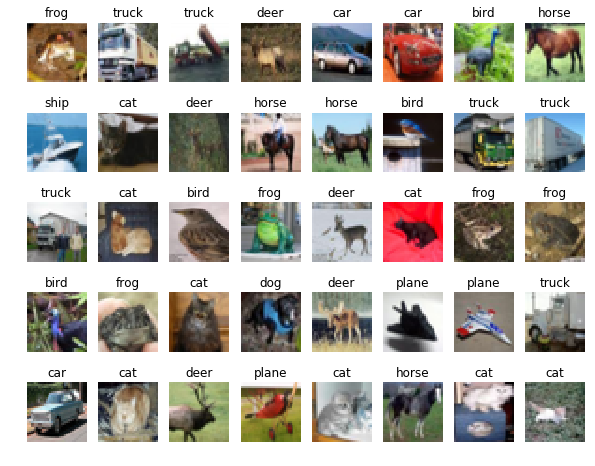

In [33]:
plt.figure(figsize=(10, 8))
for i in range(40):
    plt.subplot(5,8,i+1);
    plt.imshow(x_train[i]); 
    plt.title(classes[y_train[i,0]]); 
    plt.axis('off')

### 3.1 LeNet
<img src="https://4.bp.blogspot.com/-Xc-1oK8cPHs/WS4aYCpsnSI/AAAAAAAADdU/jOARrMWGj3gs_pAXU-C4ryAFa8C_CuBfACLcB/s1600/fig_1_3_LeCun.png">

In [5]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
opt=keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________

In [34]:
# load & preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Training:
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), shuffle=True)

# save the model
model.save('lenet_cifar10.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.3637 - acc: 0.8709 - val_loss: 2.0405 - val_acc: 0.5860
Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.3561 - acc: 0.8716 - val_loss: 2.0388 - val_acc: 0.5939
Epoch 3/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.3468 - acc: 0.8750 - val_loss: 2.1189 - val_acc: 0.5876
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.3436 - acc: 0.8770 - val_loss: 2.0785 - val_acc: 0.5903
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.3310 - acc: 0.8783 - val_loss: 2.1790 - val_acc: 0.5819
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.3256 - acc: 0.8831 - val_loss: 2.1622 - val_acc: 0.5818
Epoch 7/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.3194 - acc: 0.8849 - val_loss: 2.2510 - val_acc

In [21]:
# load a pre-trained model:
#model=keras.models.load_model('lenet_cifar10.h5')

# Testing (on the training data):
print(model.predict(x_train[0:2]))
print(model.predict_classes(x_train[0:2]))
print(y_test[0:2])

[[  1.45851198e-09   1.04271758e-05   5.99951530e-03   1.05938129e-01
    7.74516258e-03   1.31842969e-02   8.66963506e-01   1.58861832e-04
    7.68263035e-08   2.30879732e-10]
 [  8.52749480e-08   1.21344772e-06   1.20468613e-07   9.05433280e-12
    1.02289921e-11   1.30620978e-13   1.88415623e-16   4.70915841e-12
    1.84182920e-06   9.99996781e-01]]
[6 9]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


### 3.2 Advanced CNNs
Check out more pre-trained models on https://keras.io/applications/

In [67]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img_path = 'girl.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # Or use cv2.resize to resize images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 6us/step
Predicted: [('n03942813', 'ping-pong_ball', 0.12260579), ('n09229709', 'bubble', 0.09411379), ('n02786058', 'Band_Aid', 0.07347261)]
